In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

Diffential equation modeling the circuit is given by:
\begin{equation}
\frac{dx}{dt} = - \frac{dU(x)}{dx} + \eta(t) + A \cos(\omega t)
\end{equation}

\begin{equation}
U(x) = -\frac{a x^2}{2} + \frac{b x^4}{4}
\end{equation}

The differential eqaution with circuit parameters
\begin{equation}
\frac{dV_2}{dt} = - \frac{1}{C_1} \left( \frac{-V_2 + V_2^3}{R_2} + \frac{f(t)}{R_1} - \frac{A \cos(\omega t)}{R_3} \right)
\end{equation}

\begin{equation}
C_1 = 0.1 nF
\end{equation}

\begin{equation}
R_1 = R_2 = R_3 = 1 M \Omega
\end{equation}

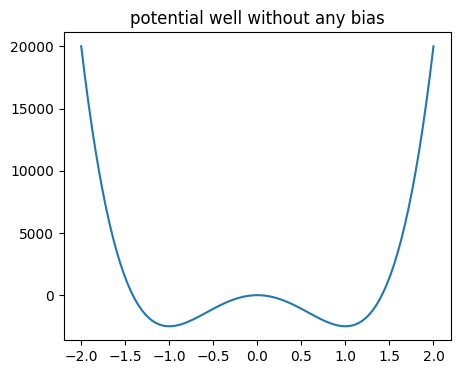

In [2]:
# modeling the double well with the parameters of the circuit
C1 = 0.1e-9
R2 = 1e6
a = b = 1/(C1*R2)
x = np.linspace(-2,2,100)
U = -a*x**2/2 + b*x**4/4

#visualizing the double-well
plt.figure(figsize=(5,4))
plt.plot(x,U)
plt.title("potential well without any bias")
plt.show()

Now if we apply a DC bias voltage to this system

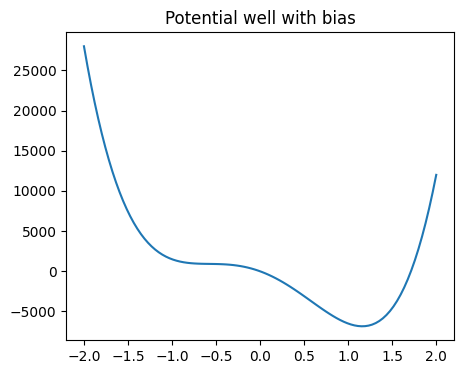

In [3]:
bias = -0.4
c = a
U_bias = -a*x**2/2 + b*x**4/4 + c*bias*x

#visualizing the double-well
plt.figure(figsize=(5,4))
plt.plot(x,U_bias)
plt.title("Potential well with bias")
plt.show()

[[-0.87888507]
 [-0.20914885]
 [ 1.08803391]]


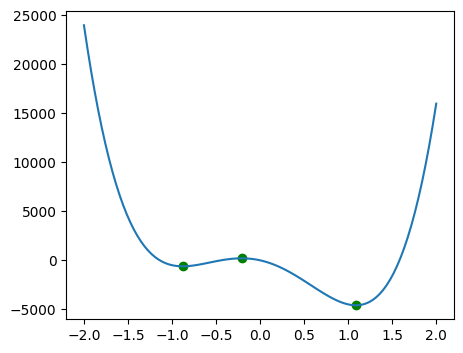

In [4]:

# calculating PA and PC
def findU(x,bias):
    C1 = 0.1e-9
    R2 = 1e6
    a = b = c = 1/(C1*R2)
    return -a*x**2/2 + b*x**4/4 + c*bias*x

def soldU_dx(x,bias):
    C1 = 0.1e-9
    R2 = 1e6
    a = b = c = 1/(C1*R2)
    return -a*x + b*x**3 + c*bias

def findPAPC(bias):
    xminL = sc.optimize.fsolve(soldU_dx,-1,args=(bias))
    xmax = sc.optimize.fsolve(soldU_dx,0,args=(bias))
    xminR = sc.optimize.fsolve(soldU_dx,2,args=(bias))
    return np.array([xminL, xmax, xminR])

bias = -0.2
plt.figure(figsize=(5,4))
plt.plot(x, findU(x,bias))
plt.scatter(findPAPC(bias),findU(findPAPC(bias),bias),c = 'green')
print(findPAPC(bias))

The threshold for the modulating signal’s amplitude A beyond which there is only one minimum in the potential function:

\begin{equation}
A_t = \pm \frac{2a}{3} \sqrt{\frac{a}{3b}}
\end{equation}

\begin{equation}
= \pm 0.3849 \cdot a \sqrt{\frac{a}{b}}
\end{equation}

since a = b = c, and the A_t is also amplified by the same value c. we can conclude: $A_t$ = 0.3849


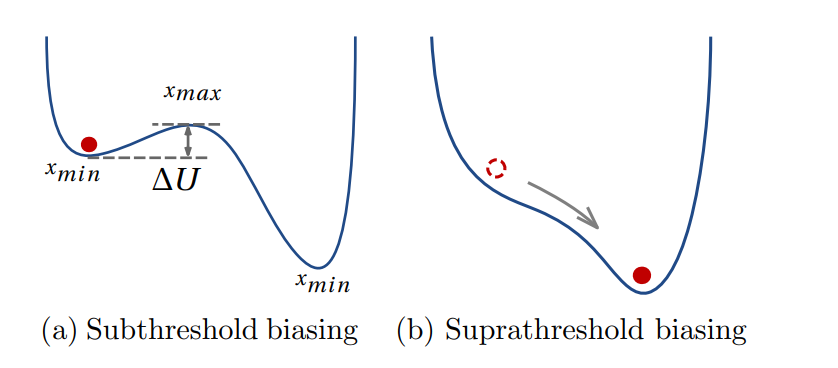

The mean first passage time of the particle from one well to the other well is called Kramers time:
\begin{equation}
\tau_k = \frac{2\pi e^{2\Delta U/D}}{|U"(x_{min})U"(x_{max})|^{1/2}}
\end{equation}

\begin{equation}
\frac{d^2U}{dx^2} = -a + 3bx^2
\end{equation}

where ∆U is the potential difference between the maxima and one of the minima. xmin and xmax are the location of the minima and maxima respectively


In [5]:
#second derivative of U is
def findd2U(x):
     return -a + 3*b*x**2

def findkrammerstime(bias, var_noise):
     if bias > 0:
          xmin = findPAPC(bias)[2]
          xmax = findPAPC(bias)[1]
     else:
          xmin = findPAPC(bias)[0]
          xmax = findPAPC(bias)[1]
     dU2min = findd2U(xmin)
     dU2max = findd2U(xmax)
     delU = findU(xmax,bias) - findU(xmin,bias)
     D = var_noise*c

     #kramer's time
     tk = (2*np.pi*np.exp(2*delU/D))/np.sqrt(abs(dU2max*dU2min))

     #print(xmin, xmax, dU2min, dU2max, dU2min*dU2max, delU, D, tk)
     return tk

#Note : The Variance of the noise has to be multiplied with the value of $\frac{1}{R_1C_1}$ since noise is also getting scaled by the same factor.

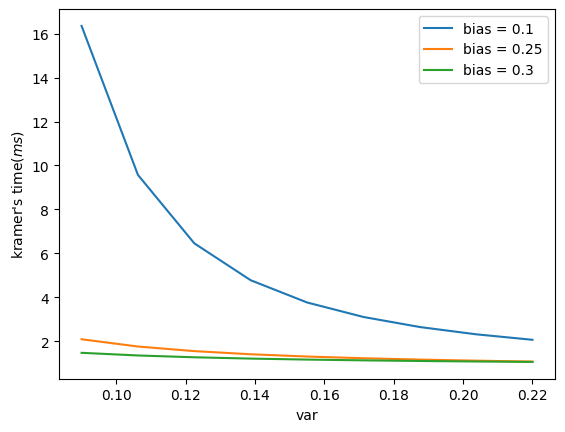

In [13]:
var = np.linspace(0.09,0.22,9) #idk why these values of variance only giving a meaningfull plot.
tk1 = findkrammerstime(0.1,var)
tk2 = findkrammerstime(0.25,var)
tk3 = findkrammerstime(0.3,var)

plt.plot(var,tk1*1e3,label="bias = 0.1")
plt.plot(var,tk2*1e3,label="bias = 0.25")
plt.plot(var,tk3*1e3,label="bias = 0.3")
plt.xlabel("var")
plt.ylabel("kramer's time($ m s$)")
plt.legend()